# 2a)

['__header__', '__version__', '__globals__', 'x_eval', 'x_train', 'y_eval', 'y_train']


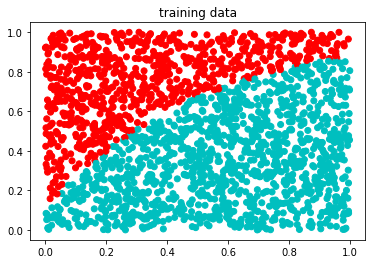

In [5]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('classifier_data.mat')
# print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()


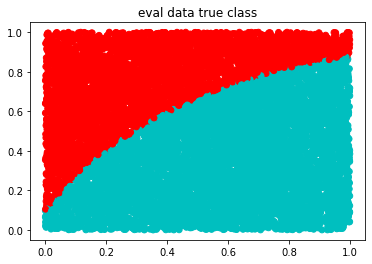

In [2]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

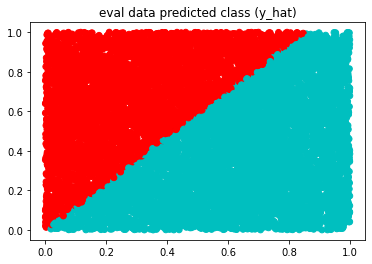

In [3]:
## Classifier 1 

# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()


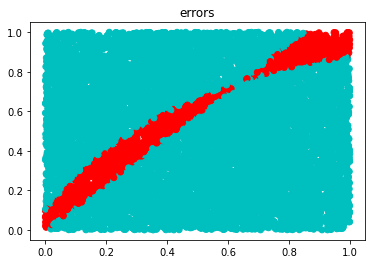

Errors: 1102


0.1102

In [11]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))
sum(error_vec) / len(error_vec)
'''
We can see that the data that we have clearly forms a parabolic function so as we used a line as a decision 
boundry then for values of x below of 0.4 (Approximately) we will have errors above the line. Analogously for 
values of x above 0.6 (Approximately) we will have error below the line.
'''

# 2b)

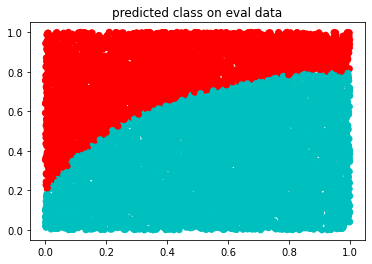

In [12]:
## Classifier 2
x_train_2 = np.hstack((x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**2, x_eval, np.ones((n_eval,1)) ))

w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = np.sign(x_eval_2@w_opt_2)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_2[:,0]])
plt.title('predicted class on eval data')
plt.show()

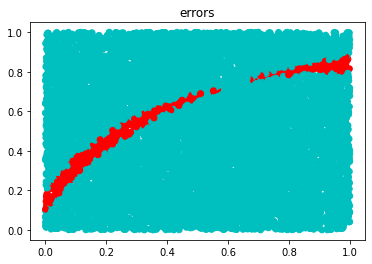

Error: 542


0.0542

In [15]:
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_2, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))
sum(error_vec_2) / len(error_vec_2)
'''
In this case we used a parabolic function as a decision boundry. We can see a big difference on the percentage of 
error of misclassified data. This is because as we saw, our data has like a parabolic form. So using a parable 
then we will minimise the errors
'''

# 2c)

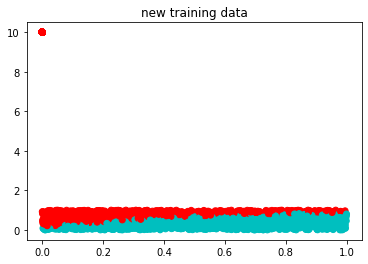

'\n~ What happens to the decision boundary when these new data points are included in training? ~\nWhen we add those new data points the decision boundary changes completely. These points are changing the boundary \nto be more close to them. Although these points are correctly labeled, as they are highly separated from the \nrest of the data we have, they change the boundary in a way that many of the other correct other points end below \nthese boundary. So, a big amount of data (although correctly labeled) separated from the rest of the correct data\nchange the decision boundary in a way that it increases the error prduced.\n\n~ What happens to the error rate if you move the 1000 data points to x1 = 0, x2 = 10? Why does this happen? ~\nIn this case, we have the same situation as we did with x1 = 0,x2 = 3, however the points are further away so \nthey change even more the decision boundary and the amount of errors that occur.\n'

In [23]:
## create new, correctly labeled points 
n_new = 1000 #number of new datapoints
x_train_new = np.hstack((np.zeros((n_new,1)), 10*np.ones((n_new,1))))
y_train_new = np.ones((n_new,1))

## add these to the training data
x_train_outlier = np.vstack((x_train,x_train_new))
y_train_outlier = np.vstack((y_train,y_train_new))
plt.scatter(x_train_outlier[:,0],x_train_outlier[:,1], color=['c' if i==-1 else 'r' for i in y_train_outlier[:,0]])
plt.title('new training data')
plt.show()
'''
~ What happens to the decision boundary when these new data points are included in training? ~
When we add those new data points the decision boundary changes completely. These points are changing the boundary 
to be more close to them. Although these points are correctly labeled, as they are highly separated from the 
rest of the data we have, they change the boundary in a way that many of the other correct other points end below 
these boundary. So, a big amount of data (although correctly labeled) separated from the rest of the correct data
change the decision boundary in a way that it increases the error prduced.

~ What happens to the error rate if you move the 1000 data points to x1 = 0, x2 = 10? Why does this happen? ~
In this case, we have the same situation as we did with x1 = 0,x2 = 3, however the points are further away so 
they change even more the decision boundary and the amount of errors that occur.
'''

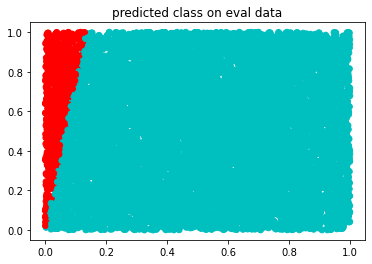

In [21]:
#train with new data
w_opt_outlier = np.linalg.inv(x_train_outlier.transpose()@x_train_outlier)@x_train_outlier.transpose()@y_train_outlier
y_hat_outlier = np.sign(x_eval@w_opt_outlier)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

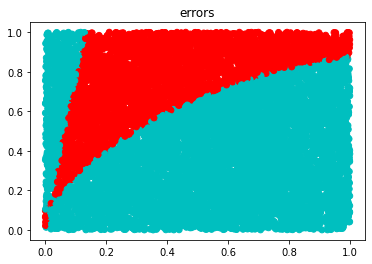

Errors: 3277


In [22]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))